# Project in Improving Visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [12,9]  # width and height in inches

Import the mortgage application dataset. Column definitions are available [on this website](https://ffiec.cfpb.gov/documentation/2018/lar-data-fields/).

In [3]:
df = pd.read_csv( '2018_public_lar_csv_sample.csv' )

Convert two quantitative columns to floats to have some numbers to plot.

In [4]:
df = df[df['loan_amount'].map( lambda x: x != 'Exempt' )]
df['loan_amount'] = df['loan_amount'].astype( float )
df = df[df['origination_charges'].map( lambda x: x != 'Exempt' )]
df['origination_charges'] = df['origination_charges'].astype( float )

## Exercise 1: Improve this plot

The code below tries to compare the loan amount vs. origination charges scatterplot for men to that of women, but as you can see from the plot, it doesn't really show us much.

Make whatever changes you think are helpful to make the plot show the data better.

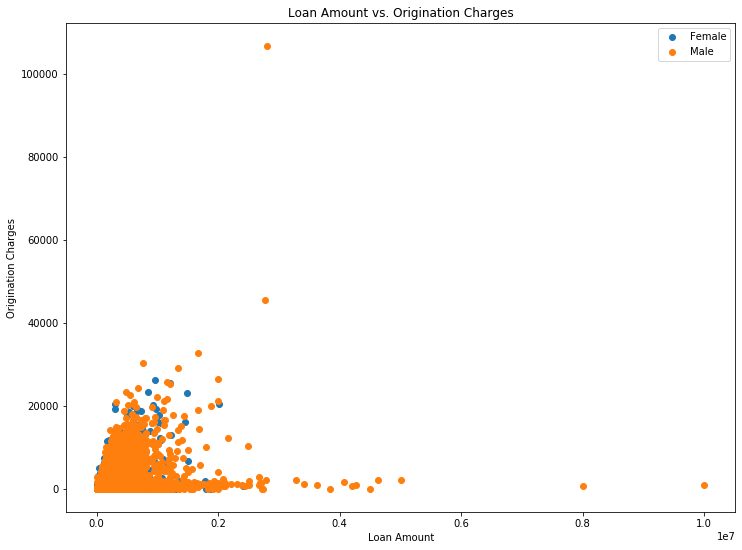

In [5]:
x = 'loan_amount'
y = 'origination_charges'
plt.scatter( df[df.derived_sex == 'Female'][x], df[df.derived_sex == 'Female'][y], label='Female' )
plt.scatter( df[df.derived_sex == 'Male'][x], df[df.derived_sex == 'Male'][y], label='Male' )
plt.xlabel( 'Loan Amount' )
plt.ylabel( 'Origination Charges' )
plt.title( 'Loan Amount vs. Origination Charges' )
plt.legend()
plt.show()

## Put your solution to Exercise 1 here

Use the code box below.

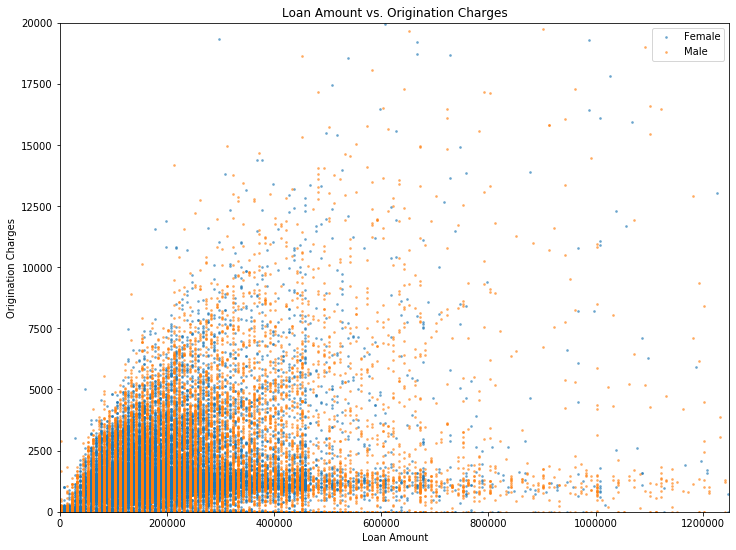

In [17]:
x = 'loan_amount'
y = 'origination_charges'
plt.scatter( df[df.derived_sex == 'Female'][x]+2500, df[df.derived_sex == 'Female'][y], label='Female', alpha=0.5, s=3 )
plt.scatter( df[df.derived_sex == 'Male'][x]-2500, df[df.derived_sex == 'Male'][y], label='Male', alpha=0.5, s=3 )
plt.xlabel( 'Loan Amount' )
plt.ylabel( 'Origination Charges' )
plt.title( 'Loan Amount vs. Origination Charges' )
plt.xlim( 0, 1250000 )
plt.ylim( 0, 20000 )
plt.legend()
plt.show()

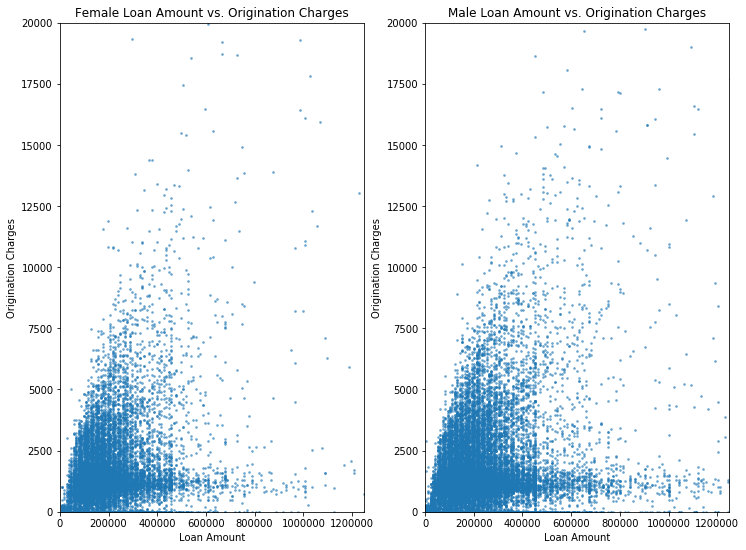

In [21]:
x = 'loan_amount'
y = 'origination_charges'
plt.subplot( 1, 2, 1 )
plt.scatter( df[df.derived_sex == 'Female'][x]+2500, df[df.derived_sex == 'Female'][y], label='Female', alpha=0.5, s=3 )
plt.xlabel( 'Loan Amount' )
plt.ylabel( 'Origination Charges' )
plt.title( 'Female Loan Amount vs. Origination Charges' )
plt.xlim( 0, 1250000 )
plt.ylim( 0, 20000 )
plt.subplot( 1, 2, 2 )
plt.scatter( df[df.derived_sex == 'Male'][x]-2500, df[df.derived_sex == 'Male'][y], label='Male', alpha=0.5, s=3 )
plt.xlabel( 'Loan Amount' )
plt.ylabel( 'Origination Charges' )
plt.title( 'Male Loan Amount vs. Origination Charges' )
plt.xlim( 0, 1250000 )
plt.ylim( 0, 20000 )
plt.show()

## Exercise 2: Improve this plot

The code below tries to compare the histograms of loan amount for three different loan purposes, but as you can see from the plot, it failed spectacularly.

Make whatever changes you think are helpful to make the plot show the desired result.

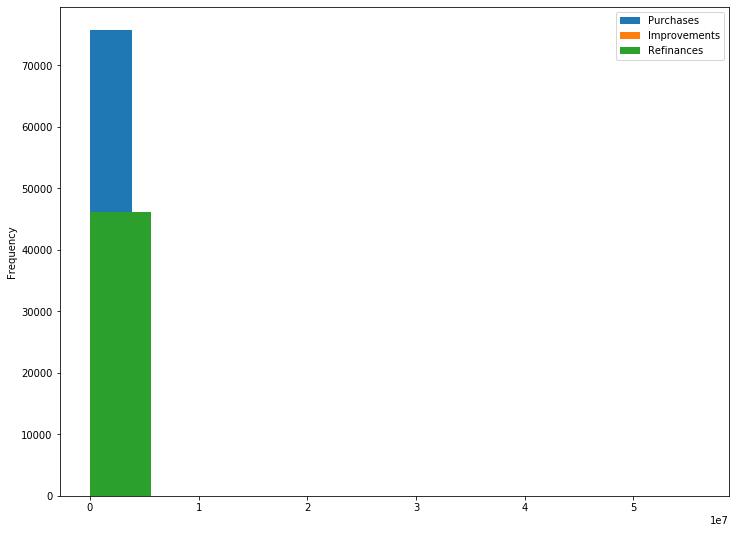

In [24]:
df[df.loan_purpose == 1].loan_amount.plot( kind='hist', label='Purchases' )
df[df.loan_purpose == 2].loan_amount.plot( kind='hist', label='Improvements' )
df[df.loan_purpose > 30].loan_amount.plot( kind='hist', label='Refinances' )
plt.legend()
plt.show()

## Put your solution to Exercise 2 here

Use the code box below.

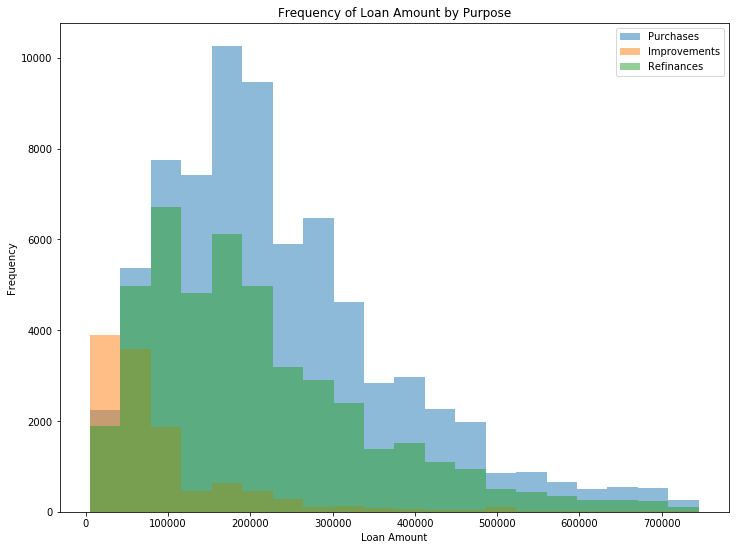

In [34]:
focus = df[df.loan_amount < 750000]
focus[focus.loan_purpose == 1].loan_amount.plot( kind='hist', label='Purchases', bins=20, alpha=0.5, density=False )
focus[focus.loan_purpose == 2].loan_amount.plot( kind='hist', label='Improvements', bins=20, alpha=0.5, density=False )
focus[focus.loan_purpose > 30].loan_amount.plot( kind='hist', label='Refinances', bins=20, alpha=0.5, density=False )
plt.xlabel( 'Loan Amount' )
plt.title( 'Frequency of Loan Amount by Purpose' )
# plt.yscale( 'log' )
plt.legend()
plt.show()

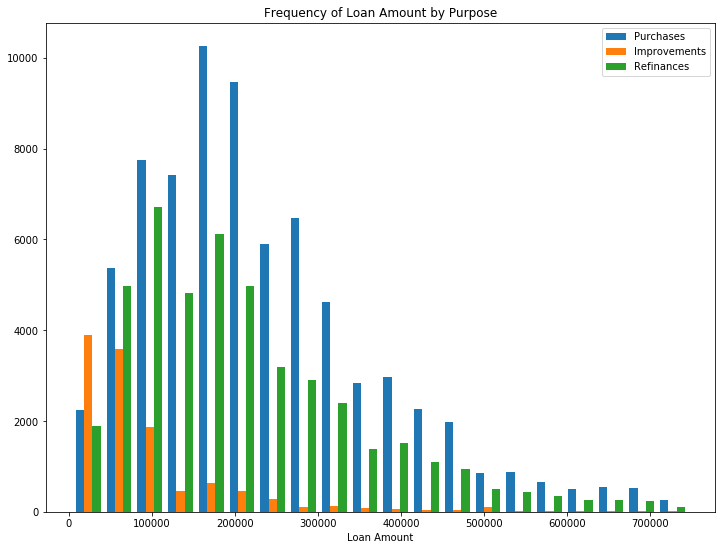

In [37]:
focus = df[df.loan_amount < 750000]
plt.hist( [
    focus[focus.loan_purpose == 1].loan_amount,
    focus[focus.loan_purpose == 2].loan_amount,
    focus[focus.loan_purpose > 30].loan_amount
], label=[ 'Purchases', 'Improvements', 'Refinances' ], bins=20 )
plt.xlabel( 'Loan Amount' )
plt.title( 'Frequency of Loan Amount by Purpose' )
# plt.yscale( 'log' )
plt.legend()
plt.show()

## Exercise 3: Improve this plot

The code below tries to compare the numbers of loan applicants from each race, but there are a few things wrong with the plot. 

Also, make whatever changes you think are helpful to make a visualization that accomplishes the desired goal.

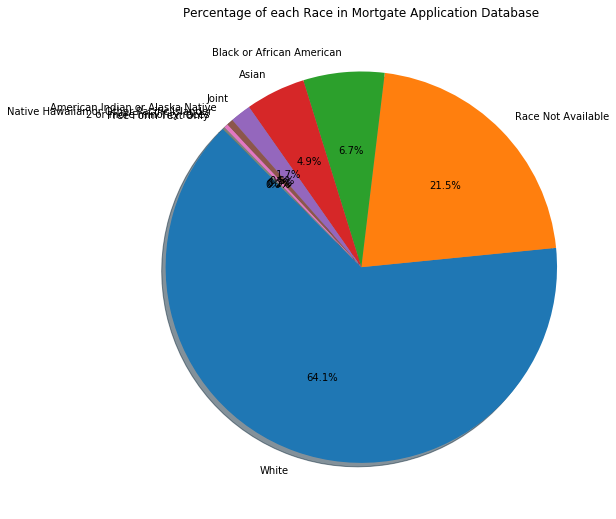

In [7]:
race_freq = df.derived_race.value_counts()
plt.title( 'Percentage of each Race in Mortgate Application Database' )
plt.pie( race_freq, labels=race_freq.index, autopct='%1.1f%%', shadow=True, startangle=135 )
plt.show()

## Put your solution to Exercise 3 here

Use the code box below.

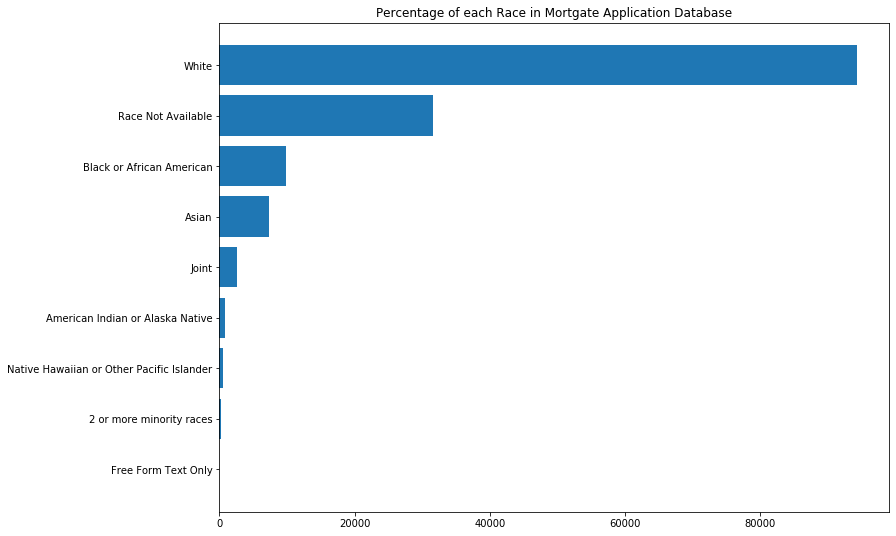

In [42]:
race_freq = df.derived_race.value_counts()
plt.title( 'Percentage of each Race in Mortgate Application Database' )
plt.barh( range(len(race_freq)), width=race_freq, tick_label=race_freq.index )
plt.gca().invert_yaxis()
plt.show()